# COGS 108 - EDA Checkpoint

# Names

- Alan Xia
- David Lu
- Jin Noh
- Nathan Tewinpagti
- Ricky Wen

# Research Question

Which statistical metrics (e.g. Player Efficiency Rating, box plus-minus, true shooting percentage, etc.) have the highest predictive accuracy when it comes to determining a player's career longevity over the past 20 seasons within the NBA and how does this differ across positions?

## Background and Prior Work

In the fast paced, high-stakes world of professional basketball, fans, sports analysts, and front offices constantly seek to identify key indicators of a player’s long term success. Commonly, traditional stats like points per game and rebounds have long been used to assess a player’s value; however, there are advanced analytics such as player efficiency rating, box plus-minus, and true shooting percentages that offer a deeper insight into a player’s impact on the court and in the future for an NBA team. This project looks to discover which advanced statistic has the most significance when predicting a player’s career length.

<a name="cite_ref-1"></a>[<sup>1</sup>](#cite_note-1) Some prior work relevant to our research question can be found in an NBA career longevity prediction project in which the authors applied machine learning models to predict whether or not players will play at least 5 years in the NBA given by their performances within their rookie season. Critically, this project utilized more than twenty variables to understand what factors allowed players to thrive in the NBA, such as BLK (average blocks per game), OREB (average offensive rebounds per game), TOV (average turnovers per game), and a lot more. By applying these statistics to models such as SVM and logistic regression, the authors have interpreted that variables such as the amount of games played in a season and win percentage tends to contribute greater results to a team and thus one’s career in the long term.

<a name="cite_ref-2"></a>[<sup>2</sup>](#cite_note-2) In another project, an analyst Ian Geertsen sought to compare how people rank the greatest NBA players versus how a “machine” would rank the greatest NBA players based on stats. Geertsen scraped data for the “people” ranking portion from 3 groups: media, fans, and experts. When scraping for data in the media and expert portion Geertsen chose 8 reliable media sources’ rankings and 7 trusted experts’ rankings to use as data. For the fan portion Geertsen utilized 7 polls and weighed the results based on the number of responses to ensure the data wasn’t heavily skewed because of sample sizes. 

For the “machine” part, Geertsen used ten metrics to rank every player in order to find the greatest player. Geertsen categorized these statistics into two types, a rate based category (BPM, PIPM) and a sum based category (Win Shares, Raptor JAWS). In order to more fairly calculate a player’s greatness it is important to also weigh a player’s efficiency rather than their sum as certain players had shorter careers. When comparing the machine ranking with the man ranking the lists essentially shared a similar ranking with similar players in the top 12 of each list except for one outlier that was David Robinson. With these results, Geertsen was able to learn that the statistics he used (VORP, PER, BPM, Win Shares, RAPTOR +/-, RAPTOR JAWS, CORP, WOWYR, POPM +/-, PIPM Wins Added) were a good predictor in measuring how great a player was. With great players essentially being guaranteed long careers, we can use the statistics that Ian Geertsen used in our project and see how the correlation of each statistic relates to the length of an NBA career and how these statistics apply to a larger sample size.

1. <a name="cite_note-1"></a> [^](#cite_ref-1) (Feb 2022) NBA Career Longevity Prediction. *The New York Times*. https://achanbour.github.io/nba-project/index.html#i-project-introduction 
2. <a name="cite_note-2"></a> [^](#cite_ref-2) Geertsen, Ian. (21 Sep 2020) Man vs Machine: Human and Analytical Evaluations of NBA Greats. *Bruin Sports Analytics*. https://www.bruinsportsanalytics.com/post/man_vs_machine 

# Hypothesis


We predict that players with higher win shares and true shooting percentages (TS%) are more likely to have longer careers. TS% is defined by a players efficiency at scoring, which is one of the most important factors in team success. We also expect win shares, which is defined as a player's overall contribution to winning games, to have a strong correlation to career longevity because teams prioritize players who enhance their chances of winning.

# Data

Assuming the dataset were ideal, we would have access to detailed player performance metrics such as points per game, assists per game, rebounds per game, and shooting efficiency. We would also get detailed injury history data for each player, covering everything from minor to severe injuries, including recovery times and any recurrence of those injuries throughout their career. Ideally, this dataset would include all NBA players throughout history, around 4800 in total. The data would be organized in a relational database for easy storage and querying. Player statistics would be sourced from Basketball-Reference, while injury data would be gathered from the official NBA injury reports provided by each team.

The NBA provides detailed reports of all players and their stats from the 2024-2025 season all the way back to the 1946-47 season. For easier data wrangling we can also use NBA Players Dataset on Kaggle or Basketball-Reference. NBA Injury Database will be able to provide the injury information. However, this may be different from the ideal dataset as there may be minor injuries that are not ultimately reported or injuries before entering the NBA which may be protected by medical confidentiality

## Data overview

To access the data, please run the following command in a terminal or cell: pip install nba_api
- NBA Advanced Stats
  - NBA Advanced Stats 2002-2022
  - https://www.kaggle.com/datasets/owenrocchi/nba-advanced-stats-20022022
  - Number of observations: 12211
  - Number of variables: 28
- NBA Games Data
  - Games Details
  - https://www.kaggle.com/datasets/nathanlauga/nba-games/data?select=games_details.csv
  - Number of observations: 668628
  - Number of variables: 29

The first dataset provides statistical metrics for NBA players from 2002 to 2022, providing detailed insights into player performance beyond basic box score statistics. Some important variables in the dataset are PER (player efficiency rating), TS% (true shooting percentage) and WS (win shares) which are crucial metrics for diving into our research question. We would need to clean our data by dropping unecessary columns such as "Unnamed: 0" as well as handle any missing values or convert data types such as "year-name" to "name" since a "year" column already exists.

The second dataset provides basic box score statistics from 2004 to 2023, providing a general view into a specific performances in a player's career. Important variables such as FTA (free throws attempted), PF (personal fouls) and the team name - the latter variable can utilized for predicting the player's value to a team. There are multiple columns that are unecessary so we can simply remove the columns such as the team abbreviation and player nickname.

The third dataset is similar to the first one, with the difference being that it contains the career lengths of each player up until a certain season, given in years. The main thing we want to extract from this dataset is a player's career length, which we can directly use to predict longevity with. An issue is that this dataset shows the number of years of experience of each player up until a particular season, but there would be duplicates if we look at multiple years. To mitigate this, we can only take the maximum of the career length column for each player.

We plan to standardize the second dataset so that we can combine any overlapping variables between both datasets, essentially providing more accurate numbers to predict a career's longetivity with both basic box scores and advanced statistics. We can also merge the datasets, given the position of each player and the teams they have played for.

## NBA Advanced Stats

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
advanced_stats_df = pd.read_csv("Data/NBA_Advanced_Stats_2002-2022.csv")
advanced_stats_df.shape

(12211, 28)

In [3]:
# take a look at first dataset
advanced_stats_df.head()

,Unnamed: 0,year-name,Pos,Age,Tm,G,MP,PER,TS%,3PAr,...,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,year
0,0,2003-Tariq Abdul-Wahad,SG,28,DAL,14,204,12.4,0.470,0.017,...,15.0,0.2,0.2,0.4,0.104,-1.6,0.2,-1.4,0.0,2003
1,1,2003-Shareef Abdur-Rahim,PF,26,ATL,81,3087,19.9,0.566,0.051,...,24.2,7.4,2.3,9.7,0.151,2.3,-0.7,1.6,2.8,2003
2,2,2003-Courtney Alexander,PG,25,NOH,66,1360,9.3,0.459,0.113,...,21.3,0.1,1.0,1.1,0.040,-3.3,-1.2,-4.5,-0.9,2003
3,3,2003-Malik Allen,PF,24,MIA,80,2318,9.9,0.455,0.005,...,19.7,-1.7,2.6,0.9,0.018,-3.9,-0.4,-4.4,-1.4,2003
4,4,2003-Ray Allen,SG,27,TOT,76,2880,21.3,0.565,0.391,...,27.8,7.6,1.5,9.1,0.152,4.7,-1.0,3.6,4.1,2003


In [4]:
advanced_stats_df = advanced_stats_df.drop(columns=["Unnamed: 0"])
advanced_stats_df["Player Name"] = advanced_stats_df["year-name"].str.split("-").str[1]
advanced_stats_df = advanced_stats_df.drop(columns=["year-name"])
advanced_stats_df.columns

Index(['Pos', 'Age', 'Tm', 'G', 'MP', 'PER', 'TS%', '3PAr', 'FTr', 'ORB%',
       'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS', 'DWS',
       'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP', 'year', 'Player Name'],
      dtype='object')

In [5]:
advanced_stats_df = advanced_stats_df.get(['Player Name', 'Pos', 'Age', 'Tm', 'G', 'MP', 'PER', 'TS%', '3PAr', 'FTr', 'ORB%',
       'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS', 'DWS',
       'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP', 'year'])
advanced_stats_df.head()

,Player Name,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,...,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,year
0,Tariq Abdul,SG,28,DAL,14,204,12.4,0.470,0.017,0.103,...,15.0,0.2,0.2,0.4,0.104,-1.6,0.2,-1.4,0.0,2003
1,Shareef Abdur,PF,26,ATL,81,3087,19.9,0.566,0.051,0.457,...,24.2,7.4,2.3,9.7,0.151,2.3,-0.7,1.6,2.8,2003
2,Courtney Alexander,PG,25,NOH,66,1360,9.3,0.459,0.113,0.289,...,21.3,0.1,1.0,1.1,0.040,-3.3,-1.2,-4.5,-0.9,2003
3,Malik Allen,PF,24,MIA,80,2318,9.9,0.455,0.005,0.153,...,19.7,-1.7,2.6,0.9,0.018,-3.9,-0.4,-4.4,-1.4,2003
4,Ray Allen,SG,27,TOT,76,2880,21.3,0.565,0.391,0.253,...,27.8,7.6,1.5,9.1,0.152,4.7,-1.0,3.6,4.1,2003


In [6]:
advanced_stats_df.describe()

,Age,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,...,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,year
count,12211.000000,12211.000000,12211.000000,12206.000000,12143.000000,12139.000000,12139.000000,12206.000000,12206.000000,12206.000000,...,12206.000000,12211.000000,12211.000000,12211.000000,12206.000000,12211.000000,12211.000000,12211.000000,12211.000000,12211.000000
mean,26.538777,45.357874,1046.308329,12.445379,0.513641,0.270418,0.287378,5.451262,14.569900,10.010437,...,18.543192,1.110867,1.051151,2.163377,0.067993,-1.751232,-0.234649,-1.986004,0.500925,2013.036852
std,4.202183,26.084990,861.618007,6.655481,0.104659,0.224198,0.237570,5.040813,6.837086,5.128961,...,5.510340,1.872498,1.107955,2.723092,0.106706,9.997313,1.880475,10.464400,1.200409,5.826648
min,18.000000,1.000000,0.000000,-54.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,-3.300000,-0.600000,-2.100000,-1.312000,-1000.000000,-31.100000,-1000.000000,-2.000000,2003.000000
25%,23.000000,22.000000,264.500000,9.400000,0.480000,0.029000,0.165000,2.000000,9.900000,6.200000,...,14.900000,0.000000,0.200000,0.200000,0.031000,-3.300000,-1.100000,-3.700000,-0.100000,2008.000000
50%,26.000000,48.000000,861.000000,12.500000,0.526000,0.269000,0.250000,3.900000,13.500000,8.900000,...,18.100000,0.400000,0.700000,1.200000,0.077000,-1.400000,-0.200000,-1.500000,0.000000,2013.000000
75%,29.000000,69.000000,1710.500000,15.800000,0.565000,0.431500,0.358000,8.100000,18.500000,13.200000,...,21.900000,1.700000,1.600000,3.300000,0.118000,0.300000,0.700000,0.400000,0.700000,2018.000000
max,44.000000,85.000000,3485.000000,133.800000,1.500000,1.000000,6.000000,100.000000,100.000000,86.400000,...,54.600000,14.800000,9.100000,20.300000,2.712000,199.400000,42.700000,242.200000,11.800000,2022.000000


## Games Details

In [7]:
games_details_df = pd.read_csv("Data/games_details.csv", low_memory=False)
games_details_df.shape

(668628, 29)

In [8]:
# take a look at second dataset
games_details_df.head()

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,NICKNAME,START_POSITION,COMMENT,MIN,...,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
0,22200477,1610612759,SAS,San Antonio,1629641,Romeo Langford,Romeo,F,NaN,18:06,...,1.0,1.0,2.0,0.0,1.0,0.0,2.0,5.0,2.0,-2.0
1,22200477,1610612759,SAS,San Antonio,1631110,Jeremy Sochan,Jeremy,F,NaN,31:01,...,6.0,3.0,9.0,6.0,1.0,0.0,2.0,1.0,23.0,-14.0
2,22200477,1610612759,SAS,San Antonio,1627751,Jakob Poeltl,Jakob,C,NaN,21:42,...,1.0,3.0,4.0,1.0,1.0,0.0,2.0,4.0,13.0,-4.0
3,22200477,1610612759,SAS,San Antonio,1630170,Devin Vassell,Devin,G,NaN,30:20,...,0.0,9.0,9.0,5.0,3.0,0.0,2.0,1.0,10.0,-18.0
4,22200477,1610612759,SAS,San Antonio,1630200,Tre Jones,Tre,G,NaN,27:44,...,0.0,2.0,2.0,3.0,0.0,0.0,2.0,2.0,19.0,0.0


In [9]:
games_details_df = games_details_df.drop(columns=["TEAM_ABBREVIATION", "NICKNAME", "COMMENT"])
games_details_df.columns

Index(['GAME_ID', 'TEAM_ID', 'TEAM_CITY', 'PLAYER_ID', 'PLAYER_NAME',
       'START_POSITION', 'MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A',
       'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'STL',
       'BLK', 'TO', 'PF', 'PTS', 'PLUS_MINUS'],
      dtype='object')

In [10]:
games_details_df.describe()

,GAME_ID,TEAM_ID,PLAYER_ID,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,...,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
count,6.686280e+05,6.686280e+05,6.686280e+05,558938.000000,558938.000000,558938.000000,558938.000000,558938.000000,558938.000000,558938.000000,...,558938.000000,558938.000000,558938.00000,558938.000000,558938.000000,558938.000000,558938.000000,558938.000000,558938.000000,535277.000000
mean,2.171771e+07,1.610613e+09,4.013434e+05,3.588446,7.896652,0.416842,0.778117,2.186019,0.201032,1.733217,...,1.024212,3.033798,4.05801,2.103958,0.721436,0.460339,1.320297,1.999538,9.688218,-0.000488
std,5.656289e+06,8.652260e+00,7.225618e+06,3.030466,5.677002,0.251913,1.227615,2.569913,0.289685,2.353981,...,1.397830,2.687384,3.48250,2.475476,0.972231,0.860962,1.402329,1.502963,8.082152,10.665573
min,1.030000e+07,1.610613e+09,1.500000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-57.000000
25%,2.070003e+07,1.610613e+09,2.466000e+03,1.000000,3.000000,0.267000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.00000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,-7.000000
50%,2.120096e+07,1.610613e+09,2.011810e+05,3.000000,7.000000,0.429000,0.000000,1.000000,0.000000,1.000000,...,1.000000,2.000000,3.00000,1.000000,0.000000,0.000000,1.000000,2.000000,8.000000,0.000000
75%,2.180014e+07,1.610613e+09,2.034710e+05,5.000000,11.000000,0.571000,1.000000,4.000000,0.400000,3.000000,...,2.000000,4.000000,6.00000,3.000000,1.000000,1.000000,2.000000,3.000000,14.000000,6.000000
max,5.210021e+07,1.610613e+09,1.962938e+09,28.000000,50.000000,1.000000,14.000000,24.000000,1.000000,26.000000,...,18.000000,25.000000,31.00000,25.000000,10.000000,12.000000,12.000000,15.000000,81.000000,57.000000


## Career Lengths

In [11]:
career_lengths_df = pd.read_csv('Data/Advanced.csv')
career_lengths_df.head()

,seas_id,season,player_id,player,birth_year,pos,age,experience,lg,tm,...,tov_percent,usg_percent,ows,dws,ws,ws_48,obpm,dbpm,bpm,vorp
0,31136,2024,5025,A.J. Green,NaN,SG,24.0,2,NBA,MIL,...,5.5,15.2,0.7,0.3,1.1,0.084,-0.4,-1.7,-2.1,0.0
1,31137,2024,5026,A.J. Lawson,NaN,SG,23.0,2,NBA,DAL,...,9.6,20.0,0.0,0.3,0.2,0.036,-3.1,-1.5,-4.6,-0.2
2,31138,2024,5027,AJ Griffin,NaN,SF,20.0,2,NBA,ATL,...,11.3,17.3,-0.4,0.0,-0.4,-0.120,-6.0,-3.5,-9.6,-0.3
3,31139,2024,4219,Aaron Gordon,NaN,PF,28.0,10,NBA,DEN,...,11.2,17.8,4.5,2.6,7.1,0.148,1.2,0.1,1.3,1.9
4,31140,2024,4582,Aaron Holiday,NaN,PG,27.0,6,NBA,HOU,...,10.6,16.7,1.3,1.2,2.5,0.094,-1.8,0.3,-1.5,0.2


In [12]:
# find maximum experience for each player, indicating the length of their career
# note that experience starts at 1
career_lengths_df = career_lengths_df.groupby("player").max()["experience"].reset_index(name="career_length")
career_lengths_df

,player,career_length
0,A.C. Green,16
1,A.J. Bramlett,1
2,A.J. English,2
3,A.J. Green,2
4,A.J. Guyton,3
...,...,...
5157,Šarūnas Marčiulionis,7
5158,Žan Tabak,6
5159,Žarko Paspalj,1
5160,Žarko Čabarkapa,3


# Results

## Exploratory Data Analysis

### Data Cleaning

For the purpose of exploratory data analysis, it will be beneficial to have a merged data frame containing all the relevant metrics we want to utilize as well as the associated career lengths of each player. We can accomplish by merging the career lengths dataframe and the advanced stats dataframe.

In [13]:
advanced_stats_df.rename(columns={"Player Name": "player"}, inplace=True)
df = advanced_stats_df.merge(career_lengths_df, on = 'player', how = 'left')
df.head()

,player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,...,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,year,career_length
0,Tariq Abdul,SG,28,DAL,14,204,12.4,0.470,0.017,0.103,...,0.2,0.2,0.4,0.104,-1.6,0.2,-1.4,0.0,2003,NaN
1,Shareef Abdur,PF,26,ATL,81,3087,19.9,0.566,0.051,0.457,...,7.4,2.3,9.7,0.151,2.3,-0.7,1.6,2.8,2003,NaN
2,Courtney Alexander,PG,25,NOH,66,1360,9.3,0.459,0.113,0.289,...,0.1,1.0,1.1,0.040,-3.3,-1.2,-4.5,-0.9,2003,3.0
3,Malik Allen,PF,24,MIA,80,2318,9.9,0.455,0.005,0.153,...,-1.7,2.6,0.9,0.018,-3.9,-0.4,-4.4,-1.4,2003,10.0
4,Ray Allen,SG,27,TOT,76,2880,21.3,0.565,0.391,0.253,...,7.6,1.5,9.1,0.152,4.7,-1.0,3.6,4.1,2003,18.0


After merging these dataframes, we can observe that there are many missing entries in the career length column. Specifically, we can observe that there are 145 such entries, as shown below. The reason for this is that there is an inherent discrepancy between the players that are included in both of these datasets, meaning that some players in the advanced_stats_df do not appear in career_lengths_df. 

In [14]:
df['career_length'].isnull().sum()

145

In [15]:
df[df['career_length'].isnull()].head()

,player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,...,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,year,career_length
0,Tariq Abdul,SG,28,DAL,14,204,12.4,0.470,0.017,0.103,...,0.2,0.2,0.4,0.104,-1.6,0.2,-1.4,0.0,2003,NaN
1,Shareef Abdur,PF,26,ATL,81,3087,19.9,0.566,0.051,0.457,...,7.4,2.3,9.7,0.151,2.3,-0.7,1.6,2.8,2003,NaN
44,Ruben Boumtje,C,24,POR,2,5,18.4,0.000,0.000,0.000,...,0.0,0.0,0.0,0.114,2.2,4.5,6.7,0.0,2003,NaN
483,Shareef Abdur,PF,27,TOT,85,2684,19.9,0.557,0.032,0.407,...,6.1,2.0,8.1,0.145,2.3,-0.7,1.6,2.4,2004,NaN
484,Shareef Abdur,PF,27,ATL,53,1956,21.2,0.568,0.029,0.423,...,5.3,1.3,6.6,0.163,3.3,-1.0,2.3,2.1,2004,NaN


We can verify this fact by selecting a player from the advanced_stats_df, and seeing if there is a corresponding observation in the career_lengths_df. We can use Jeremiah Robinson as an example, and run the following code to see if he is present in advanced_stats_df:

In [16]:
career_lengths_df[career_lengths_df['player'] == 'Jeremiah Robinson']

,player,career_length


As we can see, Jeremiah Robinson is listed as an observation in advanced_stats_df but not in career_lengths_df. Note that this is not the case for all of the missing entries however, and that some of the entries are simply missing because of a syntactical error or a difference in spelling. Take Tariq Abdul for example. Let's see how he is represented in both data frames.

In [17]:
advanced_stats_df[advanced_stats_df['player'].str.contains('Tariq Abdul')].take([0])

,player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,...,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,year
0,Tariq Abdul,SG,28,DAL,14,204,12.4,0.47,0.017,0.103,...,15.0,0.2,0.2,0.4,0.104,-1.6,0.2,-1.4,0.0,2003


In [18]:
career_lengths_df[career_lengths_df['player'].str.contains('Tariq Abdul')].take([0])

,player,career_length
4631,Tariq Abdul-Wahad,6


As we can observe, Tariq's name is stored as Tariq Abdul-Wahad in one dataframe and simply as Tariq Abdul in the other. This shows that the missing entries can be attributed to either a difference in how a player's name is stored, or if a player wasn't present in both of the dataframes prior to merging. Therefore, for the purpose of simplifying our analysis going forth as well as to accomodate for the issue of missing entries, we will simply disregard and remove the observations in our merged dataframe that have a missing career length because they occupy such a small proportion of the total amount of observations.

In [19]:
# only ~1.19% of the entries are missing! 
df['career_length'].isnull().sum() / df.shape[0]

0.011874539349766604

In [20]:
df = df.dropna(subset = 'career_length')

In [21]:
# check if there are any other missing entries in other columns
df.isnull().sum()

player            0
Pos               0
Age               0
Tm                0
G                 0
MP                0
PER               5
TS%              66
3PAr             70
FTr              70
ORB%              5
DRB%              5
TRB%              5
AST%              5
STL%              5
BLK%              5
TOV%             57
USG%              5
OWS               0
DWS               0
WS                0
WS/48             5
OBPM              0
DBPM              0
BPM               0
VORP              0
year              0
career_length     0
dtype: int64

In [22]:
df[df['TS%'].isnull()].head()

,player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,...,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,year,career_length
376,Guy Rucker,PF,25,GSW,3,4,7.8,NaN,NaN,NaN,...,0.0,0.0,0.0,0.117,-1.6,7.2,5.6,0.0,2003,1.0
811,Jelani McCoy,C,26,CLE,2,12,-3.8,NaN,NaN,NaN,...,0.0,0.0,0.0,-0.044,-11.4,-1.3,-12.7,0.0,2004,8.0
907,Olden Polynice,C,39,LAC,2,12,-9.2,NaN,NaN,NaN,...,-0.1,0.0,-0.1,-0.394,-17.7,1.7,-16.0,0.0,2004,15.0
1097,Maurice Baker,PG,25,LAC,1,1,0.0,NaN,NaN,NaN,...,0.0,0.0,0.0,-0.009,-5.9,-2.0,-7.9,0.0,2005,1.0
1778,Josh Davis,PF,25,HOU,1,0,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,NaN,-1000.0,0.0,-1000.0,0.0,2006,4.0


We see that there are still many missing entries, particularly in the TS% column, which is the variable we are most interested in as per our hypothesis. There are some possibilities of why these entries are missing, such as if TS% wasn't recorded 20 years ago. However, we can clearly see that there are missing entries that extend to the latest year we are including in our analysis, which indicates that these observations are just incomplete. This is further supported by the fact that there are numerous other missing variables in the observations where TS% is missing. Since this only occupies 66 of our observations, we can resort to removing these observations since they occupy such a small proportion of the total observations. 

In [23]:
df = df.dropna(subset = ['TS%', '3PAr', 'FTr'])
df.head()

,player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,...,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,year,career_length
2,Courtney Alexander,PG,25,NOH,66,1360,9.3,0.459,0.113,0.289,...,0.1,1.0,1.1,0.040,-3.3,-1.2,-4.5,-0.9,2003,3.0
3,Malik Allen,PF,24,MIA,80,2318,9.9,0.455,0.005,0.153,...,-1.7,2.6,0.9,0.018,-3.9,-0.4,-4.4,-1.4,2003,10.0
4,Ray Allen,SG,27,TOT,76,2880,21.3,0.565,0.391,0.253,...,7.6,1.5,9.1,0.152,4.7,-1.0,3.6,4.1,2003,18.0
5,Ray Allen,SG,27,MIL,47,1683,19.9,0.564,0.387,0.243,...,3.8,0.5,4.3,0.123,3.4,-1.9,1.6,1.5,2003,18.0
6,Ray Allen,SG,27,SEA,29,1197,23.3,0.567,0.396,0.268,...,3.8,1.0,4.8,0.193,6.4,0.2,6.6,2.6,2003,18.0


In [24]:
# number of total missing entries
df.isnull().any().sum()

0

After a tedious cleaning process, we have ensured that our resulting dataframe is in a tidy and clean data format. We can observe that each variable forms a single column, each observation forms a single row, and there are no remaining missing entries. To clarify, although there are multiple rows for the same player due to the dataframe tracking the stats associated with each year, we can treat these as additional training examples. We can then proceed with conducting exploratory data analysis on our dataset to gain deeper insight into the distributions, relationships, outliers, and patterns present in our data.

### Univariate Analysis

We should first take a look at the summary statistics and plots associated with our variables of interest. Although our hypothesis is predicting that winshares and TS% are the most important predictors of career longevity, it can be useful to choose some other variables to compare them against. In the scope of this exploratory data analysis, we can examine player efficiency rating (PER), box plus minus (BPM), and defensive win shares (DWS) alongside TS% and winshares. These metrics introduces a balance between offensive and defensive contributions. However, note that our actual analysis may not solely be limited to these variables. Let's look at some histograms depicting the distribution of these variables along with their summary statistics, alongside with our target variable — career longevity.

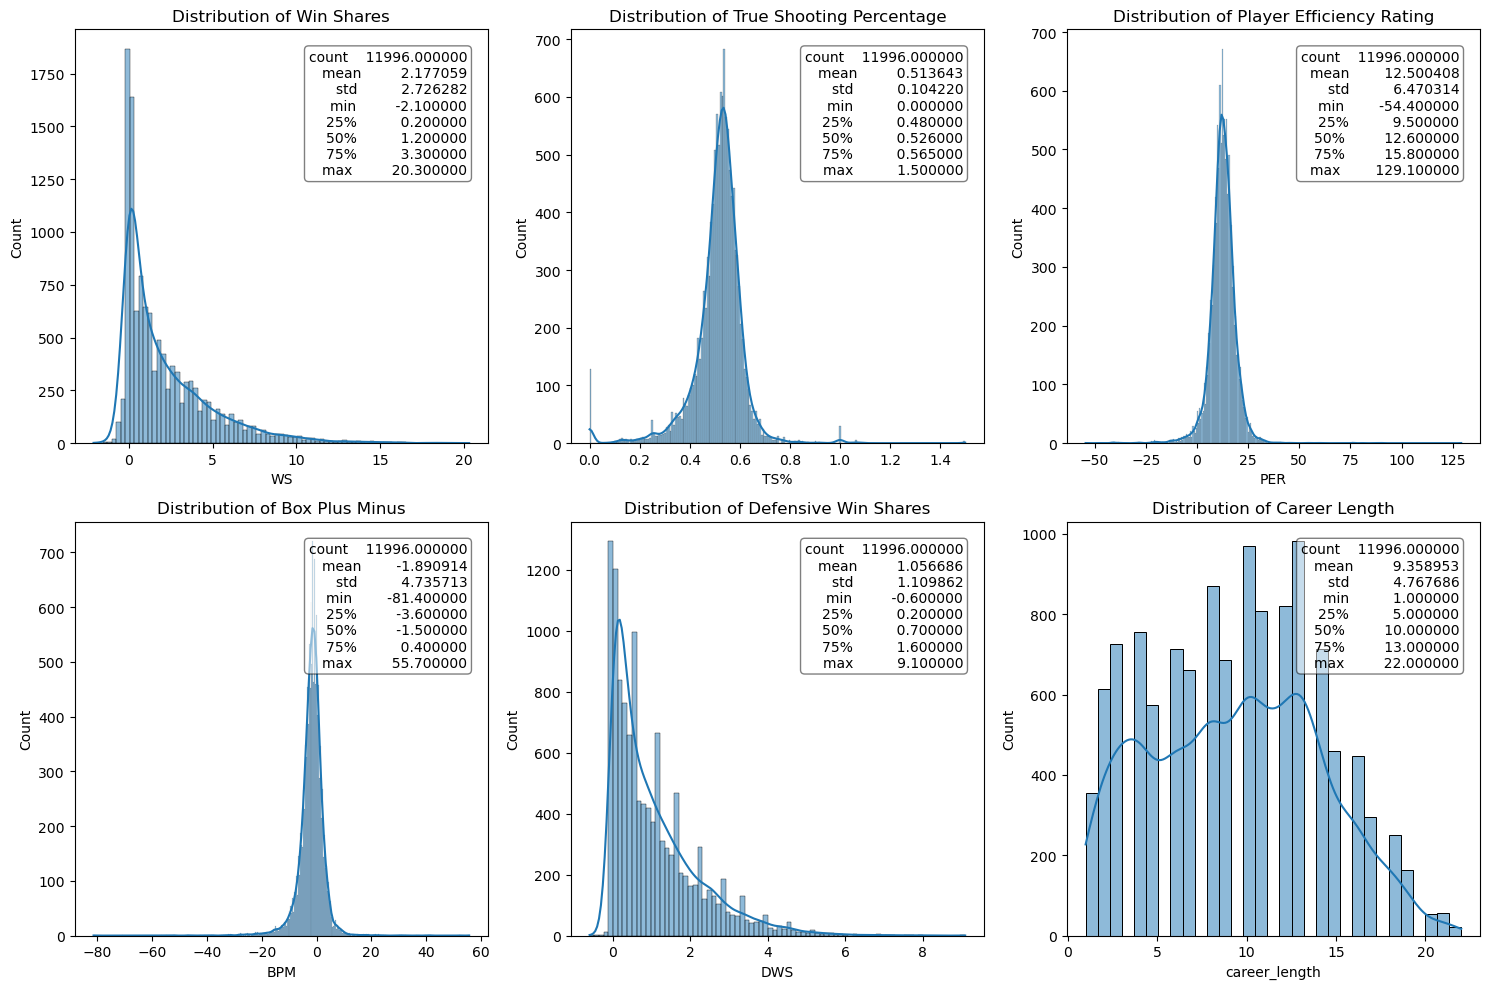

In [25]:
variables = ['WS', 'TS%', 'PER', 'BPM', 'DWS', 'career_length']
actual_names = ['Win Shares', 'True Shooting Percentage', 'Player Efficiency Rating', 
                'Box Plus Minus', 'Defensive Win Shares', 'Career Length']

fig, axes = plt.subplots(2, 3, figsize=(15, 10))

for ax, var, name in zip(axes.flatten(), variables, actual_names):
    sns.histplot(data=df, x=var, kde=True, ax=ax)
    stats = df[var].describe()
    ax.text(0.95, 0.95, stats.to_string(), transform=ax.transAxes,
            fontsize=10, verticalalignment='top', horizontalalignment='right',
            bbox=dict(boxstyle="round", facecolor="white", alpha=0.5))
    ax.set_title(f'Distribution of {name}')

plt.tight_layout()
plt.show()

**Winshares / Defensive Winshares**: We see that the plot is heavily right skewed, which indicates that the majority of players have relatively low win shares. This shows that a small number of players contribute an extreme amount of winshares (up to 20), which can most likely be attributed to superstar caliber players, while the majority don't contribute as much. The plot for defensive winshares also follows the same trend compared to winshares, indicating that there is a potential correlation between the two variables.

**True Shooting Percentage**: We can observe that the curve is roughly bell shaped with some outliers above 1.0 and many at 0.0. The outliers at 0 will require some further handling, as there are more 120 entries that have a true shooting percentage of 0. The spike at 1.0 is also unnatural, as having 100% true shooting percentage is relatively impossible. Although you can have a true shooting percentage of over 100% due to how TS% is calculated, the outlier at the max of 1.50 should also be examined because it is even more unlikely.

**Player Efficiency Rating**: This distribution is also bell shaped. There aren't too many outliers, but the player efficiency rating has a range of -54.4 to 129.1, which is extremely wide. The standard deviation is also relatively high (6.47), which reflects the wide range of performance levels in the NBA. Also, it is known that a PER of above 50 is extremely rare in the NBA, so these outliers should be subject to further investigation. 

**Box Plus Minus**: This plot is also bell shaped. The minimum is -81.4 and the maximum is 55.7, which are extreme for BPM. It is worth investigating these outliers, as the majority of the data lies between -3.6 and 0.4 based on the interquartile range. These outliers may have been a result of extremely one sided games, or may be data errors.

**Career Length**: This plot is unimodal, with a peak at around 10-12 years. The distribution is slightly skewed to the right, but not as much as win shares. We can interpret that most players last somewhere betwen 5 - 15 years, with much fewer players staying in the league for more than 15 years. The outliers here don't necessitate further investigation because of how they represent exceptionally long careers rather than inherent data errors.


### Bivariate Analysis

In this section, we can proceed to look at the relationships between pairs of variables. We can first examime some scatterplots between our main variables of interest, true shooting percentange and win shares, and our target variable, career length. This will give us an idea if there is some inherent correlation between them.

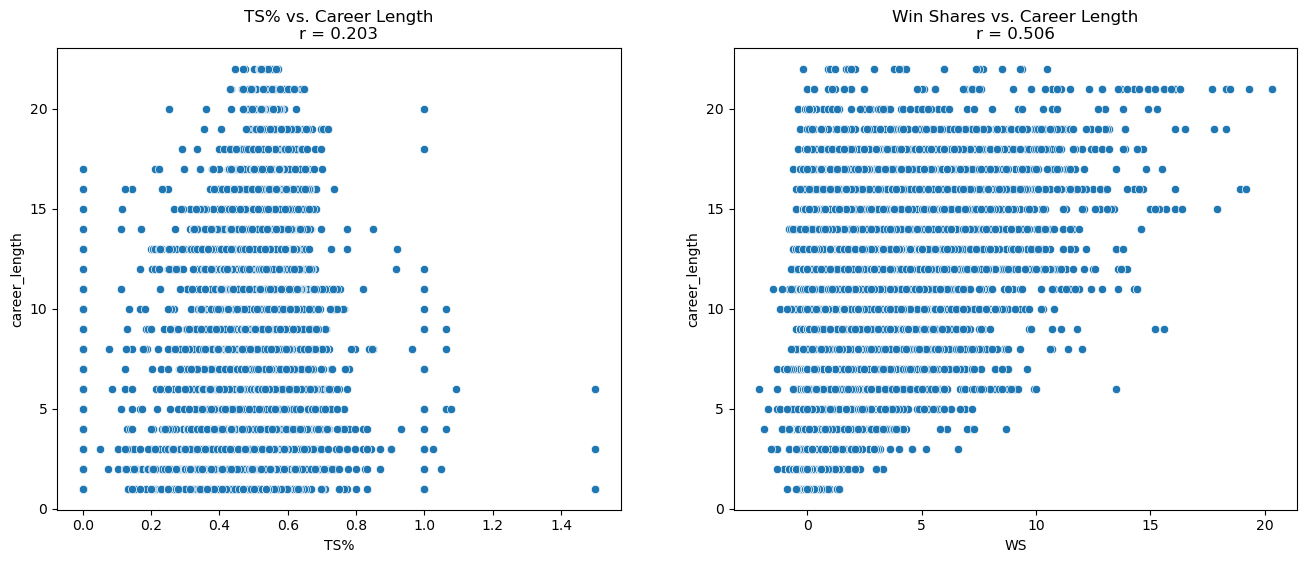

In [30]:
r_ts = df['TS%'].corr(df['career_length'])
r_ws = df['WS'].corr(df['career_length'])
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.scatterplot(data=df, x='TS%', y='career_length', ax = axes[0])
axes[0].set_title(f"TS% vs. Career Length\nr = {r_ts:.3f}")

sns.scatterplot(data=df, x='WS', y='career_length', ax = axes[1])
axes[1].set_title(f"Win Shares vs. Career Length\nr = {r_ws:.3f}")
plt.show()

r_ts = df['TS%'].corr(df['career_length'])
r_ws = df['WS'].corr(df['career_length'])



From these scatterplots as well as calculating the correlation coefficient between true shooting percentage and win shares with career length, we can see that win shares has a moderate positive linear relationship with career length with an r value of 0.506. On the other hand, true shooting percentage has an r value of 0.203, which indicates that there is a weak positive linear relationship. This shows that players with below average true shooting percentage can still have long careers if they excel in other areas. While this supports our hypothesis of win shares being an accurate predictor of career longevity, it also suggests that we might need to look at other variables instead of true shooting percentage. However, in a multiple regression task — which is appropriate for this project — an outcome like this is not always guaranteed. Regardless, we can repeat the process for the other variables we looked at in the previous section and note what we find.

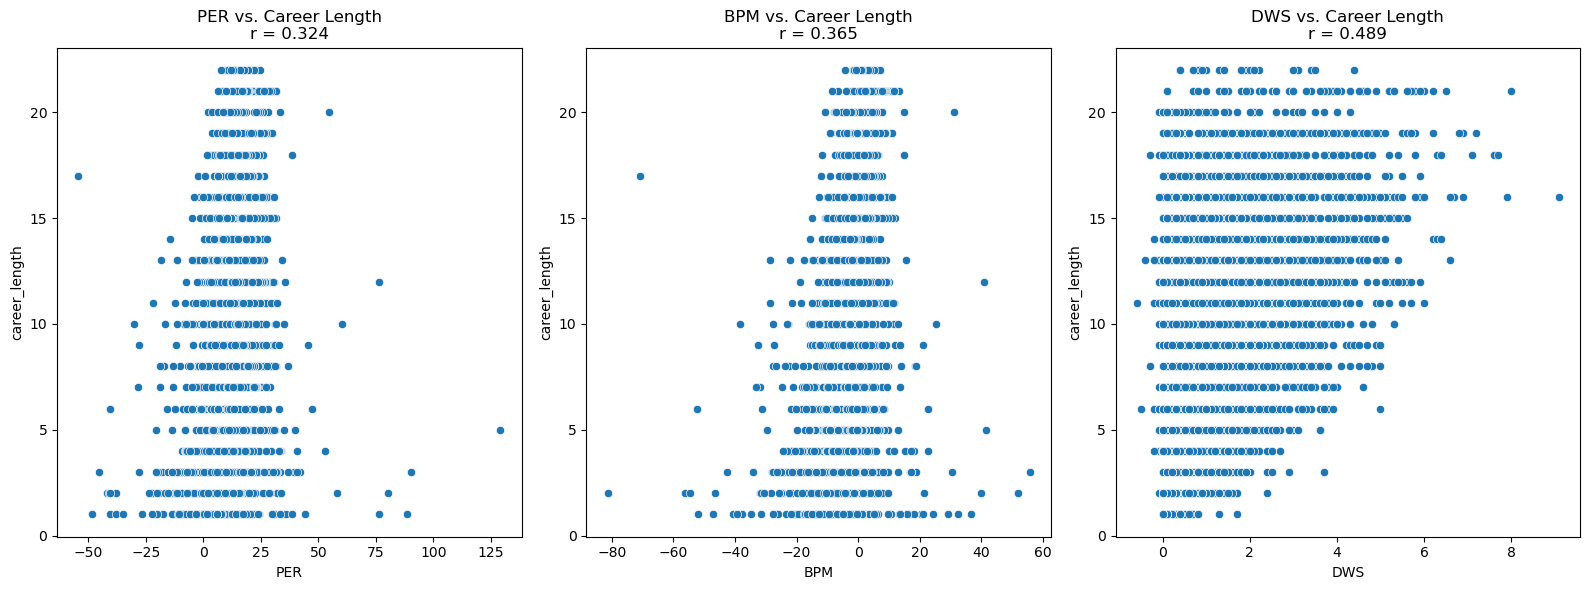

In [32]:
r_per = df['PER'].corr(df['career_length'])
r_bpm = df['BPM'].corr(df['career_length'])
r_dws = df['DWS'].corr(df['career_length'])
fig, axes = plt.subplots(1, 3, figsize=(16, 6))

sns.scatterplot(data=df, x='PER', y='career_length', ax = axes[0])
axes[0].set_title(f"PER vs. Career Length\nr = {r_per:.3f}")

sns.scatterplot(data=df, x='BPM', y='career_length', ax = axes[1])
axes[1].set_title(f"BPM vs. Career Length\nr = {r_bpm:.3f}")

sns.scatterplot(data=df, x='DWS', y='career_length', ax = axes[2])
axes[2].set_title(f"DWS vs. Career Length\nr = {r_dws:.3f}")

plt.tight_layout()
plt.show()

We can see that both player efficiency and box plus minus have a stronger correlation with career length than true shooting percentage, but they are still relatively weak to moderate positive relationships. On the other hand, defensive win shares has a stronger positive relationship comparable to win shares with a r value of 0.489. The plot also follows a triangular shape with very few outliers, showing that there are barely any players with high defensive win shares and very short careers. This suggests that strong defenders often have longer careers, and that defensive win shares might be a good choice of variable to include in our analysis later on.

As briefly mentioned before, predicting career longevity from a combination of different metrics is suitable for a regression approach — namely multiple linear regression. By treating career length as the outcome variable, multiple regression allows us to include multiple predictors and estimate how much each metric correlates to a player's overall expected career length, which is returned to us as the coefficients of our predictor variables. Additionally, assuming linearity in the parameters allows us to interpret the coefficients easier, as each weight will represent how much a one-unit change in the associated metric affects the predicted career length (assuming all the other variables are held constant).

However, when training a regression model, it is important to be mindful of the presence of multicollinearity in our features, which occurs when two or more predictors are highly correlated with each other. When multicollinearity is present, it will introduce extreme variance in the resulting coefficients, which will reduce interpretability of our model overall. A correlation matrix can show us a quick overview of all the pairwise relationships and their corresponding correlation coefficients for all the numeric features, which will let us identify which variables have the greatest correlations with career length, as well as detecting multicollinearity to see if two variables are highly correlated. For exploratory purposes, it might be beneficial to include a couple of other variables to see if they would be suitable. We'll value over replacement player (VORP), minutes played during a season (MP), and turnover percentage (TOV%).

A good starting point for our regression model is to choose predictors that correlate well with our target variable, career length, and don't exhibit high levels of multicollinearity.

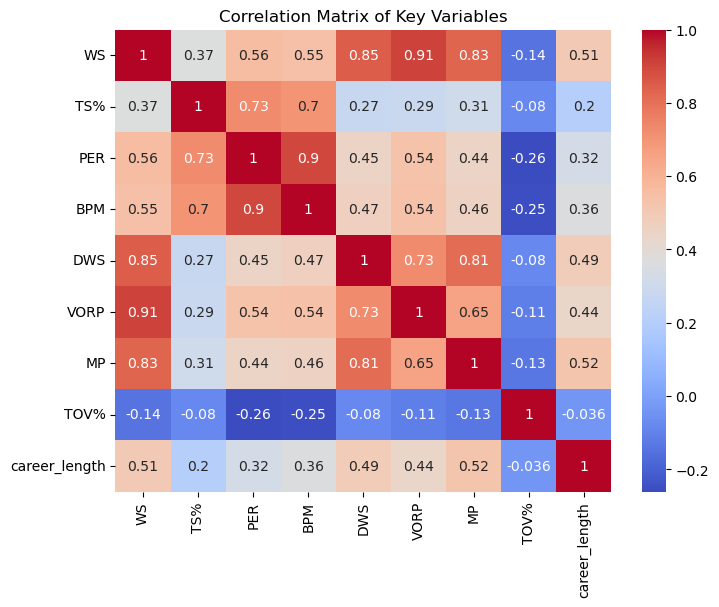

In [28]:
variables_of_interest = ['WS', 'TS%', 'PER', 'BPM', 'DWS', 'VORP', 'MP', 'TOV%', 'career_length']

corr_matrix = df[variables_of_interest].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Key Variables")
plt.show()

From this correlation matrix, we can see that in descending order, the variables that have the highest magnitude of correlation with career length are minutes played, winshares, defensive winshares, value over replacement player, and box plus minus. These are the variables that we might want to include as parameters in our model. However, we can see that WS is highly correlated with DWS, VORP, and MP, with correlation scores of over 0.83, which would lead to concerns over multicollinearity. Similarly, there is a high correlation between player efficiency rating and box plus minus, as well as between defensive win shares and minutes played. It could be beneficial to exclude win shares and keep defensive win shares, since they have similar levels of correlation with career length and defensive win shares is less correlated with the other variables.

Despite the fact that there might be collinearity between these predictor variables, it can still be acceptable to use them as parameters in our model if we apply techniques like dimensionality reduction or regularization. These techniques can help mitigate the impact of highly correlated features in our model. Otherwise, it might be too difficult to find a set of parameters that aren't highly correlated because a lot of them naturally are due to how these statistics are recorded, as well as the nature of basketball itself.



# Ethics & Privacy

### Privacy of player data and injury information 
Although our study relies on publicly available NBA player statistics based on the last 20 seasons, privacy concerns might arise on the topic of dealing with specific player information, such as injury history and external factors that might influence career longevity. Michael Beasley is a prominent example of this. Although he showed flashes of brilliance early on in his career, his lack of professionalism and off-court issues led to a shorter than expected NBA career. While our study is mainly focusing on data relating to individual player performance, it is important to note that career longevity is affected by many variables off the court, such as a player’s personal choices as well as outside factors that are out of their control. These external factors, such as lifestyle and personal history, cannot be directly incorporated into the scope of our analysis. With player injury information in particular, it can be difficult to uncover the specific details of the injury histories released by teams because they are relatively vague. It is difficult to discern the impact of these injuries on specific players by accessing reports online alone, so this brings up the question of if incorporating injury data is a reasonable choice or not. Overall, it is important to balance the need for comprehensive data analysis with respecting the individual privacy of each player, especially when dealing with the long-term impacts of how injuries can affect a player’s career.

### Bias in statistical metrics favoring offensive performance 
Many statistical metrics used in the NBA like player efficiency rating, box-plus-minus, and fantasy score, are inherently biased towards certain archetypes or playstyles. In particular, offensive contributions are far more quantifiable than defensive contributions. While a great offensive player’s impact is clearly shown in their statline, a strong defensive player’s influence on the game is not as evident from metrics alone. This inherent skew in importance is a direct result of how these statistics are recorded. From a defensive perspective, the number of blocks a defender gets per game is not directly correlated with their overall defensive performance. That is to say, a player can have a low number of blocks recorded but might be a great defender overall. This disparity between offensive and defensive contributions needs to be carefully handled, and requires a delicate balance of which metrics to include in our analysis.

### Basic mitigation strategies for these issues 
To address privacy issues relating to player data, we will make sure to strictly limit our analysis to publicly available statistics, and also acknowledge the limitations of our study by noting that statistical metrics alone cannot fully explain career longevity. By excluding external factors that might otherwise be difficult to quantify such as ones that relate with a player’s personal life off the court, our analysis becomes more generalizable while simultaneously evading privacy issues. In the same vein, it is best to exclude injury histories as a variable in our analysis because public injury reports might not cover the full context around a player’s injury. Additionally, it is known that teams occasionally list players on the injury report to let certain players get rest during games to prevent injuries, which is colloquially known as load management. This further supports not directly using injury histories as a metric in our data. We can instead use a related but simpler statistic such as total games missed per season.

During analysis, we can best mitigate bias by incorporating a wide variety of metrics to deter the influence of spurious correlations and confounding variables. Since offensive contributions are often favored in the context of NBA statistics, we should balance our metrics by including a combination of offensive, defensive, and more advanced metrics. Some examples of defensive metrics we can utilize include steal percentage, defensive win shares, and the number of opponent points scored in the paint. Creating a well-defined balance of metrics negates the presence of bias overall as it allows for a nuanced and standardized analysis of players of vastly different playstyles and archetypes. We could implement separate models and utilize different features for players of different positions as well, such as placing guards, forwards, and centers in different groups to analyze. Additionally, factors like a player’s role in their team (e.g. first option, role player, bench player), playing time, injuries, and differences in the era in which a player belongs to could potentially skew our results. To account for this, we can potentially group players by era/team role and also include injury data as a variable if available.

Furthermore, we should emphasize that our findings are merely for descriptive and exploratory purposes and should not be used as a strict set of guidelines to adhere to, and that further research should be encouraged to look at a multitude of views. Teams should consider a wide range of factors when deciding on which players to recruit, including many factors that cannot be quantified via our model. It is important to note that our model’s intent is not to be used to predict a player’s future, but rather, to examine preexisting trends based on prior data. Ultimately, this project is one that seeks to understand and uncover past trends, rather than serving as a definitive predictor of player longevity.

# Team Expectations 

* *Our team expects to respectfully communicate to one another throughout the project’s timeline*
* *Our team expects to complete their responsibilities by each deadline*
* *Our team expects to contribute equally and collaborate by providing feedback and constructive criticism as well as by communicating our findings*
* *Our team expects to prepare and attend group meetings to check on each other and cover specific issues in case of conflicts*
* *Should conflicts arise, we expect to cooperate by sharing our viewpoints and then finding a conclusion as a team*
* *Alan, David, Jin, Nathan, and Ricky will perform at their best and approach each project component with utmost diligence and contribution*

# Project Timeline Proposal

| Meeting Date  | Meeting Time| Completed Before Meeting  | Discuss at Meeting |
|---|---|---|---|
| 2/16  |  8:30 PM | Take a look at project proposal feedback  | Discuss changes and new info about checkpoint #1 | 
| 2/19  |  8:30 PM | Background research on topic data | Discuss dataset(s); draft checkpoint #1 | 
| 2/22  |  8:30 PM | Edit checkpoint #1; Look at datasets in detail  | Discuss possible rangling approaches |
| 2/23  |  8:30 PM | Import Data | Discuss Wrangling and Analysis Plan; Assign group members to lead each specific part |
| 3/1   |  8:30 PM  | Finalize wrangling/EDA; Begin Analysis | Discuss/edit Analysis; Complete project check-in |
| 3/13  |  8:30 PM  | Complete analysis; Draft results/conclusion/discussion | Discuss/edit full project |
| 3/20  |  Before 11:59 PM  | NA | Turn in Final Project & Group Project Surveys |